# Part I: Stationary Series

## a. MA Estimations

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
dfjeans = pd.read_excel("jeans_data.xlsx")

In [3]:
# fit the OLS model
jeans_model = smf.ols(formula='sales ~ price + se_indicator', data=dfjeans).fit()
# results summary
jeans_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     295.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           3.96e-17
Time:                        19:55:15   Log-Likelihood:                -102.28
No. Observations:                  26   AIC:                             210.6
Df Residuals:                      23   BIC:                             214.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      509.0259     43.675     11.655      0.000     418.677     599.375
price           -3.3287      0.329    -10.123      0.000      -4.009      -2.648
se_indicator    76.2267     10.781      7.071      0.000      53.925      98.528
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.214
Skew:                           0.367   Prob(JB):                        0.545
Kurtosis:                       2.237   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
#Residual
dataframe_convert= pd.DataFrame({"price": dfjeans['price'], 'se_indicator':dfjeans['se_indicator']})
sales_pred = jeans_model.predict(dataframe_convert)
resi=dfjeans['sales'] - sales_pred
dfjeans['resi']= resi


In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(dfjeans.resi[5:], 
                   dfjeans["resi"].rolling(3).mean()[4:25])


143.23644837736413

In [22]:
for index in range(1,6):
    print([index,mean_squared_error(dfjeans.resi[5:], 
                                    dfjeans["resi"].rolling(index).mean()[4:25])])
    

[1, 211.46384738356565]
[2, 145.56118432869349]
[3, 143.23644837736413]
[4, 143.33110071107606]
[5, 170.26800425131165]


#### According to the result shows, MA(3) has the smallest MSE which is 143.23644837736413

## b. ES Estimations

In [23]:
! pip install statsmodels --upgrade
! pip install statsmodels==0.12.0
# This has also worked:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached statsmodels-0.12.0.tar.gz (17.5 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [339 lines of output]
      Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7"' don't match your environment
        Using cached setuptools-67.6.1-py3-none-any.whl (1.1 MB)
        Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
        Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
        Using cached numpy-1.17.5.zip (6.4 MB)
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached scipy-1.10.1-cp39-cp39-macosx_10_9_x86_64.whl (35.2 MB)
        Using cached scipy-1.10.0-cp39


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/statsmodels/statsmodels to /private/var/folders/kz/r1wb87rd7mldcm88nkgwtq6m0000gn/T/pip-req-build-46oxkinw
  error: subprocess-exited-with-error
  
  × git version did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git version did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip available: 22.

In [5]:
actual = dfjeans['resi'][5:27].values
print(actual)

[ -8.28108808  16.35233161  -8.64766839  19.35233161  18.94559585
   9.35233161  -7.64766839   0.35233161  -9.64766839 -23.21891192
 -13.64766839  -8.64766839  -9.64766839 -13.64766839   4.78108808
 -12.64766839  -0.64766839  -4.64766839  -3.99222798 -11.64766839
  13.35233161]


In [25]:
from statsmodels.tsa.api import ExponentialSmoothing
import numpy as np
for alpha in np.arange(0.1, 1.1, 0.1):
    print([alpha, mean_squared_error(dfjeans.resi[5:],ExponentialSmoothing(dfjeans.resi, initialization_method
                                                                            ='estimated').fit(smoothing_level
                                                                                              = alpha).predict(5,25))])

[0.1, 155.23442458461145]
[0.2, 147.65893181968653]
[0.30000000000000004, 143.53487191252546]
[0.4, 143.81974374995647]
[0.5, 147.3810417645196]
[0.6, 153.81867382231235]
[0.7000000000000001, 163.15318392688218]
[0.8, 175.5900321076391]
[0.9, 191.4881782711312]
[1.0, 211.46384738356565]


#### SES(0.3) with the smallest MSE which is 143.53487191252546

## c. Assess MA* versus Single ES*

In [26]:
dfjeans.loc[4:25, 'ma'] = dfjeans["resi"].rolling(3).mean().iloc[4:25]
dfjeans.loc[4:25, 'ses'] = ExponentialSmoothing(dfjeans.resi, initialization_method='estimated').fit(smoothing_level 
                                                                                                      = 0.3).predict(5,27)


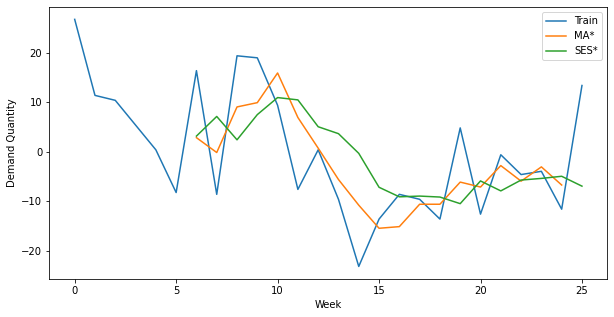

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(dfjeans.resi[:27], label='Train')
plt.plot(dfjeans.ma[6:27], label='MA*')
plt.plot(dfjeans.ses[6:27], label='SES*')
plt.legend(loc='best')
plt.xlabel('Week')
plt.ylabel('Demand Quantity')
plt.show()

# Part II: Non-Stationary Series with Trend

In [14]:
import pickle
with open('bitcoin_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [15]:
print(data)

           date         price
0    2018-02-17  10503.298333
1    2018-02-18  11110.965000
2    2018-02-19  11390.391667
3    2018-02-20  10532.791667
4    2018-02-21   9931.071667
..          ...           ...
175  2018-08-11   6311.131667
176  2018-08-12   6347.070000
177  2018-08-13   6050.942500
178  2018-08-14   6362.676923
179  2018-08-15   6342.629231

[180 rows x 2 columns]


## a. Test for non-stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller
ad_result = adfuller(data.price)
print('ADF Statistic: %f' % ad_result[0])
print('p-value: %f' % ad_result[1])

ADF Statistic: -1.918100
p-value: 0.323595


#### According to the above result, our P-value is 0.323595 which is bigger than the 0.05. Therefore, we can't reject our null hypothesis which is time series has a unit root(non-stationary)

## b. Double Exponential Smoothing (DES) estimations

In [18]:
from itertools import product
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
def DESMSE(alpha,beta):
    return mean_squared_error(data.price[10:150],
                              ExponentialSmoothing(data.price[:150],trend="add", 
                                                   initialization_method
                                                   ='estimated').fit(smoothing_level 
                                                = alpha,smoothing_trend = beta).predict(10,149))

In [19]:

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'alpha': np.arange(0.0, 1.0, 0.05), 
              'beta': np.arange(0.0, 1.0, 0.05)}

des_results = expand_grid(dictionary)
# add a column called mse
des_results["mse"] = np.repeat(0,len(des_results))

In [20]:
import time
start = time.time()
for alpha in np.arange(0.0, 1.01, 0.05):
    for beta in np.arange(0.0, 1.01, 0.05):
       des_results.loc[(des_results["alpha"] == alpha) & (des_results["beta"] == beta),"mse"] = DESMSE(alpha,beta)
#end = time.time()
#end-start


In [21]:
des_results.sort_values("mse").head(10)


,alpha,beta,mse
380,0.95,0.00,96794.753096
360,0.90,0.00,97372.973081
340,0.85,0.00,98568.985917
381,0.95,0.05,99607.965725
361,0.90,0.05,100030.342873
320,0.80,0.00,100418.792514
341,0.85,0.05,101127.626267
382,0.95,0.10,101642.187703
362,0.90,0.10,101785.735468
342,0.85,0.10,102643.461781


In [38]:
#Calculate training sample MSE for days 11 to 150
DESMSE(0.95,0.00)

96794.75027128843

In [25]:
# store DES(0.95,0.00) in the test sample
data.loc[data.index[150:], 'des'] = ExponentialSmoothing(data.price[:150],trend="add", 
                                                        initialization_method='estimated').fit(
    smoothing_level = 0.95,smoothing_trend = 0.00).forecast(30)


In [27]:
#MSE in test data
mean_squared_error(data.price[150:],data.des[150:])

917027.3167926484

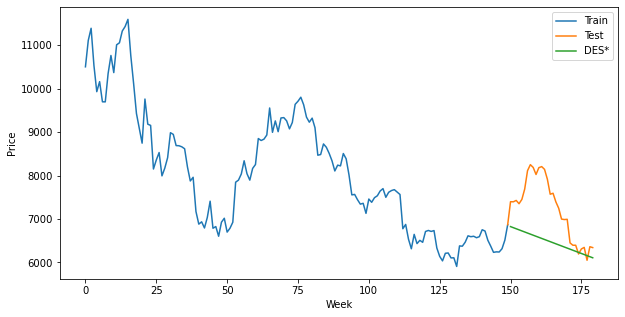

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data.price[:150], label='Train')
plt.plot(data.price[149:], label='Test')
plt.plot(data.des[150:], label='DES*')
plt.legend(loc='best')
plt.xlabel('Week')
plt.ylabel('Price')
plt.show()

#### Report resultant MSE values, 
#### The MSE of training: MSE in the training data is 96794.75027128843
#### The MSE of testing: MSE in the test data is 917027.3167926484 


## Part III: De-Seasonalizing Data and Forecasting

## a. De-seasonalize the historical data

In [32]:
dfairline = pd.read_excel("airline_data.xlsx")
dfairline
print(dfairline)
# reset index
dfairline = dfairline.reset_index()
# wide to long
dfairline = pd.melt(dfairline, id_vars=['index'])
# rename
dfairline = dfairline.iloc[12: , :]
dfairline.columns = ["month","year","load"]

print(dfairline)

   Unnamed: 0   2003   2004   2005   2006   2007   2008   2009   2010   2011  \
0     January  64.40  65.28  69.77  72.68  72.30  72.95  72.82  74.89  76.55   
1    February  68.10  68.60  71.58  76.07  75.71  75.91  75.28  77.35  77.92   
2       March  72.43  75.13  79.58  81.31  81.57  82.19  81.08  83.39  82.70   
3       April  72.13  76.17  76.64  81.34  81.38  80.09  82.10  82.55  82.13   
4         May  73.98  74.41  77.52  80.39  81.27  81.34  81.32  82.51  84.58   
5        June  78.58  80.72  82.27  84.56  86.24  84.24  85.37  86.32  85.98   
6        July  80.98  82.20  83.94  84.95  86.24  84.11  87.09  86.90  87.14   
7      August  78.74  78.74  80.34  80.90  84.89  83.35  84.97  85.20  85.59   
8   September  66.93  70.39  74.12  73.78  75.61  76.07  79.42  79.81  81.82   
9     October  71.47  74.23  75.94  77.50  78.45  79.76  82.22  83.32  83.63   
10   November  70.45  73.21  76.53  77.98  77.66  75.89  79.17  81.19  83.48   
11   December  72.52  72.74  75.81  76.5

In [34]:
# calculate sample average
dfairline["avg"] = dfairline.load.dropna().mean()
dfairline["avg"] 
#Monthly average
dfairline["month_avg"] = pd.to_numeric(dfairline['load']).groupby(dfairline['month']).transform("mean")
dfairline["month_avg"]
#Monthly factor
dfairline['Monthly_Factor'] = dfairline["month_avg"] / dfairline["avg"] 
dfairline['Monthly_Factor']
#de-sesonalized series
dfairline["de_load"] = dfairline.load / dfairline.Monthly_Factor
dfairline.tail(5)

,month,year,load,avg,month_avg,Monthly_Factor,de_load
139,7,2013,85.53,79.444692,83.169091,1.046880,81.699877
140,8,2013,80.9,79.444692,76.317273,0.960634,84.215216
141,9,2013,82.77,79.444692,79.410909,0.999575,82.805212
142,10,2013,NaN,79.444692,77.834000,0.979726,NaN
143,11,2013,NaN,79.444692,77.578000,0.976503,NaN


#### Answer: When comparing the de-seasonalized data to the original data, we observed that the de-seasonalized data appeared to have less seasonality, with a smoother overall trend. This suggests that the seasonal component of the data was effectively removed, which may improve the accuracy of our forecasting models.

## b. Test for non-stationarity

In [6]:
# Adfuller
from statsmodels.tsa.stattools import adfuller
ad_result = adfuller(dfairline.de_load.dropna())
print('ADF Statistic: %f' % ad_result[0])
print('p-value: %f' % ad_result[1])

ADF Statistic: -3.194312
p-value: 0.020316


#### Since p-value(0.020316) smaller than 0.05, we reject null hypothesis that states time series is non-stationary.

##### We are using SES and MA for this question, since we removed seasonality from series before.

In [479]:
dfairline.shape

(132, 7)

In [35]:
#SES
import numpy as np
for alpha in np.arange(0.1, 1.1, 0.1):
    print([alpha, mean_squared_error(dfairline.de_load[:-2].astype('float'),
                                     ExponentialSmoothing(dfairline.de_load[:-2].astype('float'), 
                                                          initialization_method
                                                                            ='estimated').fit(smoothing_level
                                                                                              = alpha).predict(0,129))])
#### alpha = 0.5 has the smallest MSE which is 1.7731


[0.1, 2.6926114512042774]
[0.2, 2.014251547864466]
[0.30000000000000004, 1.8607237497506601]
[0.4, 1.797861781926179]
[0.5, 1.773164435816034]
[0.6, 1.7784138463803563]
[0.7000000000000001, 1.8114733208093876]
[0.8, 1.8714705618595318]
[0.9, 1.9593665610053006]
[1.0, 2.0794061077383263]


In [39]:
dfairline.loc[129:, 'ses'] = ExponentialSmoothing(dfairline.de_load[:-2].astype('float'),
                                                 initialization_method='estimated').fit(smoothing_level 
                                                                                        = 0.5).forecast(2)
dfairline.loc[129:, 'ses']

129          NaN
130          NaN
131          NaN
132          NaN
133          NaN
134          NaN
135          NaN
136          NaN
137          NaN
138          NaN
139          NaN
140          NaN
141          NaN
142    82.877329
143    82.877329
Name: ses, dtype: float64

In [37]:
#MA: forecast of the last two months in December 2013
for index in range(1,6):
    print([index,mean_squared_error(dfairline.de_load[5:130], 
                                    dfairline["de_load"].rolling(index).mean()[4:129])])
    

dfairline.loc[130:, 'ma'] = dfairline["de_load"][:130].rolling(2).mean().iloc[-1]

print(dfairline[-3:])


[1, 2.122028293186414]
[2, 1.9396693859812697]
[3, 2.0464728995430366]
[4, 1.999502009897671]
[5, 2.203803784046814]
     month  year   load        avg  month_avg  Monthly_Factor    de_load  \
141      9  2013  82.77  79.444692  79.410909        0.999575  82.805212   
142     10  2013    NaN  79.444692  77.834000        0.979726        NaN   
143     11  2013    NaN  79.444692  77.578000        0.976503        NaN   

           ses         ma  
141        NaN  83.510214  
142  82.877329  83.510214  
143  82.877329  83.510214  


In [46]:
#Under MA scale back (10 = 0.979726; 11 = 0.976503)
M10 = 83.510214 * 0.979726
M11 = 83.510214 * 0.976503
print('MA of 10th month after scale back:{:5} ' .format(M10))
print('MA of 11th month after scale back:{:5} ' .format(M11))

#Under SES scale back (10 = 0.979726; 11 = 0.976503)
SES10 = 82.877329 * 0.979726
SES11 = 82.877329 * 0.976503
print('SES of 10th month after scale back:{:5} ' .format(SES10))
print('SES of 11th month after scale back:{:5} ' .format(SES11))

MA of 10th month after scale back:81.817127921364 
MA of 11th month after scale back:81.547974501642 
SES of 10th month after scale back:81.197074031854 
SES of 11th month after scale back:80.929960400487 
